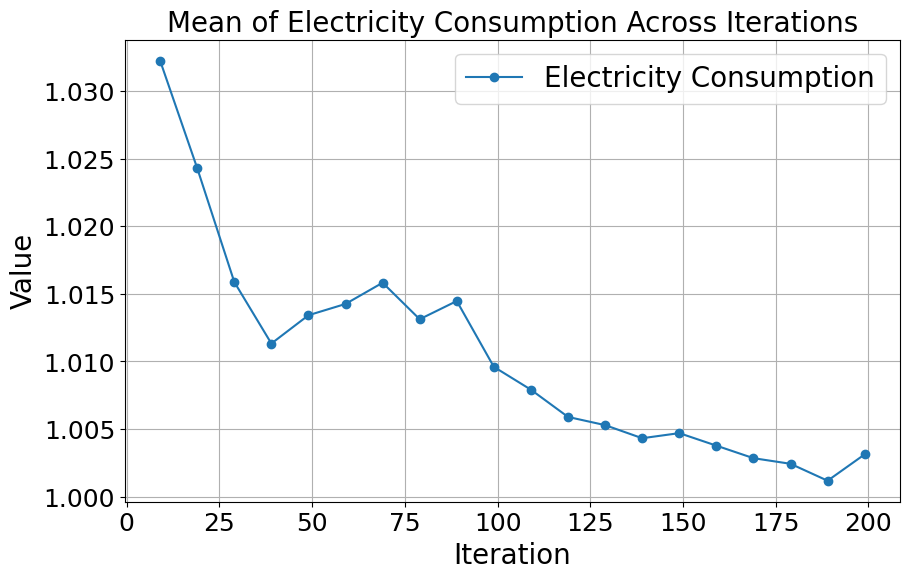

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt


metrics = "electricity_consumption_total"
# Path to the main folder
base_folder_path = 'exp/2024.08.14' ##last original in 14 August

# Initialize a dictionary to hold lists of values for each iteration
iter_values = {i: [] for i in range(9, 200, 10)}

# Loop through each folder in the base folder
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        # Loop through each iteration file (9, 19, 29, ..., 99)
        for i in range(9, 200, 10):
            file_name = f'train_online_iter_{i}.csv'
            file_path = os.path.join(folder_path, file_name)
            
            if os.path.isfile(file_path):  # Check if the file exists
                # Load the CSV file
                df = pd.read_csv(file_path)
                
                # Filter rows where level is "district"
                district_df = df[(df['level'] == 'district') & (df['cost_function']== metrics)]
                #print(district_df)
                
                # Append the 'value' data to the corresponding iteration list
                iter_values[i].extend(district_df['value'].tolist())

# Calculate mean and standard deviation for each iteration
means = []
std_devs = []
iterations = list(iter_values.keys())

for i in iterations:
    values = iter_values[i]
    if values:  # If there are any values
        means.append(pd.Series(values).mean())
        std_devs.append(pd.Series(values).std())
    else:
        means.append(None)
        std_devs.append(None)

# Plotting the results with fill between for standard deviation
plt.figure(figsize=(10, 6))
means = pd.Series(means)
std_devs = pd.Series(std_devs)

# Fill the area between mean ± std_dev
plt.plot(iterations, means, '-o', label="Electricity Consumption")
#plt.fill_between(iterations, means - std_devs, means + std_devs, alpha=0.2, label='Mean ± Std Dev')

plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(f'Mean of Electricity Consumption Across Iterations',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.ylim(0,1.03)

plt.grid(True)
plt.savefig(f"plot/metrics/{metrics}")
plt.show()
plt.close()
#plt.show()


In [ ]:
std_devs

In [ ]:
iter_values